In [131]:
#Author: Varun Ram S
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [132]:
voice_df=pd.read_csv("E:/VS-Projects/VS-Python projects/voice.csv")

In [133]:
voice_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [159]:
#Question 1: checking for null values a
voice_df.isnull().sum()
voice_df=voice_df.dropna()

In [160]:
count=voice_df['label'].value_counts()
count

1    1584
0    1584
Name: label, dtype: int64

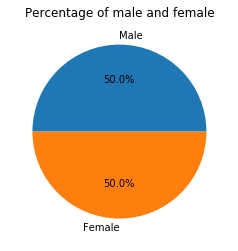

In [136]:
#Question 2: Pie chart of label
my_labels='Male','Female'
tasks=[1584,1584]
plt.pie(tasks,labels=my_labels, autopct='%1.1f%%')
plt.title("Percentage of male and female")
plt.show()

In [137]:
voice_df.shape

(3168, 21)

In [138]:
label_encode = LabelEncoder()
voice_df['label'] = label_encode.fit_transform(voice_df['label'])


In [139]:
#Question 3: Choosing dependent and independent variable to split the data set
selected_features = ['meanfreq','sd','median','Q25','Q75','IQR','skew','kurt',
                     'sp.ent','sfm','mode','centroid','meanfun'
                     ,'minfun','maxfun','meandom','mindom',
                    'maxdom','dfrange','modindx']
voice_df_X = voice_df[selected_features]
voice_df_y = voice_df.label

In [140]:
voice_df_X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [141]:
voice_df_y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int32

In [142]:
trainX, testX, trainy, testy = train_test_split(voice_df_X, voice_df_y,test_size=0.2,random_state=14)

In [152]:

algo_names=[]
algo_scores=[]

In [153]:
#Question 4 and 5 begins: Different Classifier models + ConfusionMatrix + ClassificationReport
from sklearn.tree import DecisionTreeClassifier
dec_tree=DecisionTreeClassifier(random_state=50)
dec_tree.fit(trainX,trainy)
print("Decision Tree Classifier Score is: ",dec_tree.score(testX,testy))
algo_names.append("Decision Tree")
algo_scores.append(dec_tree.score(testX,testy))
p1=dec_tree.predict(testX)
conf_m = confusion_matrix(testy, p1)
report = classification_report(testy, p1)
print(conf_m)
print()
print(report)

Decision Tree Classifier Score is:  0.9700315457413249
[[299  11]
 [  8 316]]

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       310
           1       0.97      0.98      0.97       324

   micro avg       0.97      0.97      0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



In [154]:
from sklearn.ensemble import RandomForestClassifier
rand_forest=RandomForestClassifier(random_state=50)
rand_forest.fit(trainX,trainy)
print("Random Tree Classifier score is: ", rand_forest.score(testX,testy))
algo_names.append("Random Forest")
algo_scores.append(rand_forest.score(testX,testy))
p2=rand_forest.predict(testX)
conf_m = confusion_matrix(testy, p2)
report = classification_report(testy, p2)
print(conf_m)
print()
print(report)

Random Tree Classifier score is:  0.9810725552050473
[[303   7]
 [  5 319]]

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       310
           1       0.98      0.98      0.98       324

   micro avg       0.98      0.98      0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [155]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=7)
classifier.fit(trainX,trainy)
print("KNN Classifier score is: ", classifier.score(testX,testy))
algo_names.append("KNN classifier")
algo_scores.append(classifier.score(testX,testy))
p3=rand_forest.predict(testX)
conf_m = confusion_matrix(testy, p3)
report = classification_report(testy, p3)
print(conf_m)
print()
print(report)

KNN Classifier score is:  0.7113564668769716
[[303   7]
 [  5 319]]

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       310
           1       0.98      0.98      0.98       324

   micro avg       0.98      0.98      0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [156]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(trainX, trainy)
print("Logistic Regression score is: ", model.score(testX,testy))
algo_names.append("Logistic Regression")
algo_scores.append(model.score(testX,testy))
p4=model.predict(testX)
conf_m = confusion_matrix(testy, p4)
report = classification_report(testy, p4)
print(conf_m)
print()
print(report)

Logistic Regression score is:  0.9621451104100947
[[289  21]
 [  3 321]]

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       310
           1       0.94      0.99      0.96       324

   micro avg       0.96      0.96      0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



In [157]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(trainX,trainy)
print("SVM classifier score is: ", clf.score(testX,testy))
algo_names.append("SVM classifier")
algo_scores.append(model.score(testX,testy))
p5=clf.predict(testX)
conf_m = confusion_matrix(testy, p5)
report = classification_report(testy, p5)
print(conf_m)
print()
print(report)

SVM classifier score is:  0.9227129337539433
[[264  46]
 [  3 321]]

              precision    recall  f1-score   support

           0       0.99      0.85      0.92       310
           1       0.87      0.99      0.93       324

   micro avg       0.92      0.92      0.92       634
   macro avg       0.93      0.92      0.92       634
weighted avg       0.93      0.92      0.92       634



In [161]:

max_value=max(algo_scores)
temp=algo_scores.index(max_value)
algo=algo_names[temp]
print("For our dataset, the best model is ",algo," with accuracy of ",max_value)

For our dataset, the best model is  Random Forest  with accuracy of  0.9810725552050473
